$19^{th}$ Aug 2021

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



In [3]:
#load the excel sheet containing the variants information

df_meta_seq = pd.read_excel('/home/douso/SarsGenomics/Processed/metadata-seq-MS-Merge@KB8.xlsx', usecols=['S_NUM', 'S', 'DT_CONF', 'G_COV'])

In [4]:
df_meta_seq.head()

,S_NUM,DT_CONF,G_COV,S
0,COVC00854,2020-06-13 00:00:00,94.8,"D614G,"
1,COVC00867,2020-06-13 00:00:00,66.7,"D614G, M900fs, M900fs"
2,COVC00893,2020-06-13 00:00:00,82.6,D614G
3,COVC00915,2020-06-13 00:00:00,NaN,NaN
4,COVC00962,2020-06-14 00:00:00,93.3,D614G


In [5]:
df_meta_seq80 = df_meta_seq.replace(pd.NA, np.nan)[df_meta_seq['G_COV'] >= 80]#.sort_values('DT_CONF')

In [6]:
df_data = df_meta_seq80[df_meta_seq80.index.isin(df_meta_seq80['DT_CONF'].dropna().index)]

In [7]:
spike_mut_list = []
for row in df_data.itertuples():
    mut_list = row.S.rstrip(', ').split(', ')
    spike_mut_list.extend(mut_list)

In [ ]:
# spike_mut_list

In [9]:
mut_count = Counter(spike_mut_list)
# mut_count

In [10]:
spike_muts = mut_count.elements()

<AxesSubplot:>

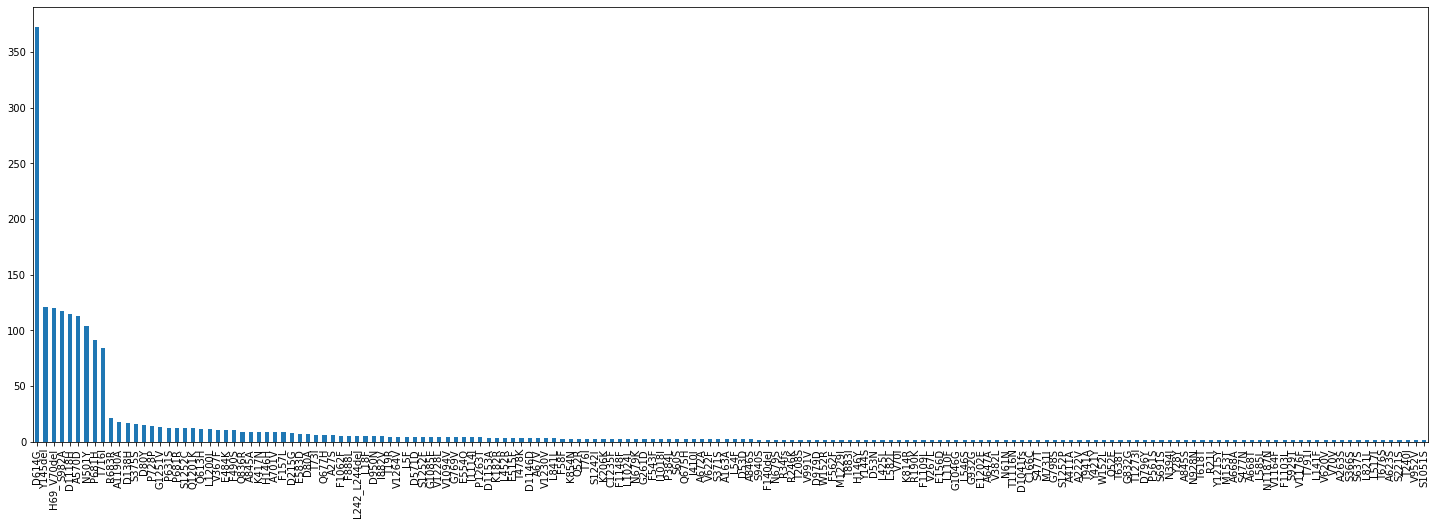

In [29]:
fig,ax = plt.subplots(figsize=(25,8))
pd.DataFrame(dict(mut_count), index=['Counts']).loc['Counts'].sort_values(ascending=False).plot.bar()

In [34]:
df_lins = pd.DataFrame(dict(mut_count), index=['Counts'])
counts = df_lins.loc['Counts']
counts_sum = df_lins.loc['Counts'].sum()
counts_rela = counts/counts_sum


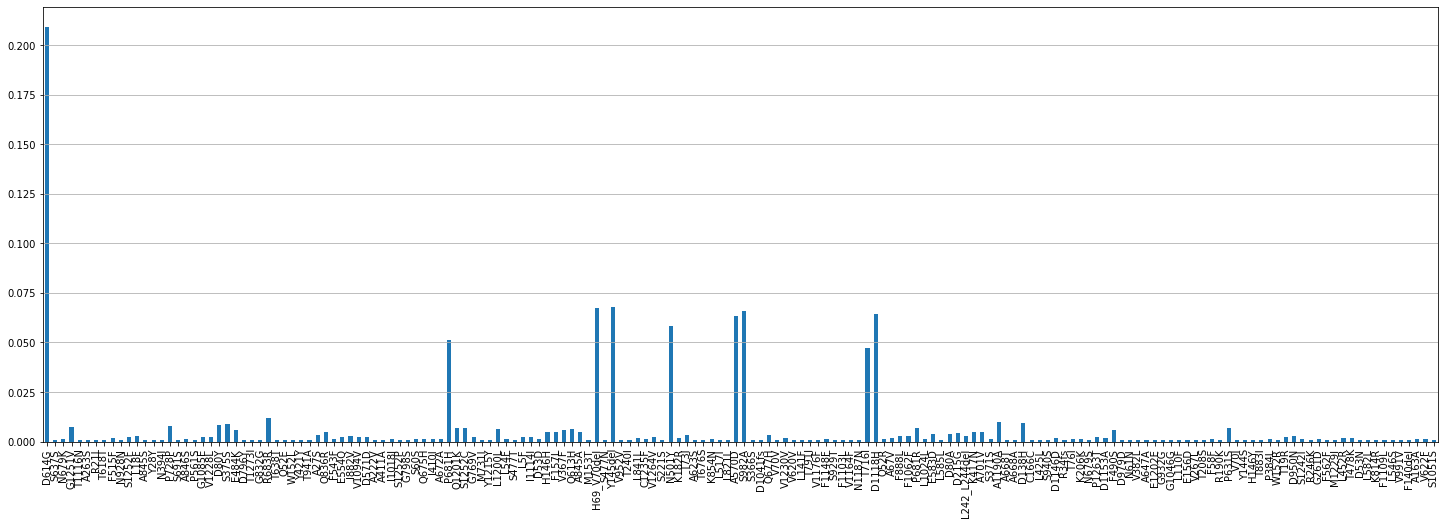

In [38]:
fig,ax = plt.subplots(figsize=(25,8))
counts_rela.plot.bar()
plt.grid('major', axis='y')

In [52]:
len(list(mut_count))

170

In [69]:
df_data_ts = df_data.set_index('DT_CONF')
df_data_ts.head()

,S_NUM,G_COV,S
DT_CONF,,,
2020-06-13,COVC00854,94.8,"D614G,"
2020-06-13,COVC00893,82.6,D614G
2020-06-14,COVC00962,93.3,D614G
2020-06-14,COVC00987,80.3,D614G
2020-06-14,COVC00998,94.4,D614G


In [70]:
df_data_ts['S'] = df_data_ts['S'].str.rstrip(', ')

In [71]:
df_data_ts.head()

,S_NUM,G_COV,S
DT_CONF,,,
2020-06-13,COVC00854,94.8,D614G
2020-06-13,COVC00893,82.6,D614G
2020-06-14,COVC00962,93.3,D614G
2020-06-14,COVC00987,80.3,D614G
2020-06-14,COVC00998,94.4,D614G


<AxesSubplot:xlabel='DT_CONF'>

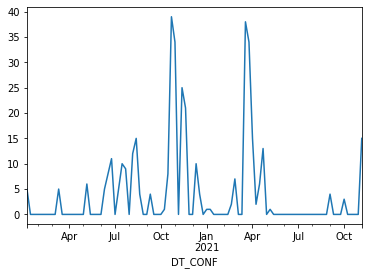

In [74]:
df_data_ts['S'].resample('W', origin='start').count().plot()